https://www.kaggle.com/code/sanjay2017/twitter-sentiment-analysis-a-guide-using-svm

In [17]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv("twitter_cleaned.csv")
df

,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"['A', 'thats', 'a', 'bummer', 'You', 'shoulda'..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,"['is', 'upset', 'that', 'he', 'cant', 'update'..."
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,"['I', 'dived', 'many', 'times', 'for', 'the', ..."
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,"['my', 'whole', 'body', 'feels', 'itchy', 'and..."
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"['no', 'its', 'not', 'behaving', 'at', 'all', ..."
...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,"['Just', 'woke', 'up', 'Having', 'no', 'school..."
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,"['TheWDBcom', 'Very', 'cool', 'to', 'hear', 'o..."
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,"['Are', 'you', 'ready', 'for', 'your', 'MoJo',..."
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,"['Happy', '38th', 'Birthday', 'to', 'my', 'boo..."


In [19]:
data=df[['text','target']]
data.head()

,text,target
0,"['A', 'thats', 'a', 'bummer', 'You', 'shoulda'...",0
1,"['is', 'upset', 'that', 'he', 'cant', 'update'...",0
2,"['I', 'dived', 'many', 'times', 'for', 'the', ...",0
3,"['my', 'whole', 'body', 'feels', 'itchy', 'and...",0
4,"['no', 'its', 'not', 'behaving', 'at', 'all', ...",0


In [20]:
data['target'] = data['target'].replace(4,1) # 1 positive sentiment
data['target'].value_counts()

<ipython-input-20-c0b7caa22cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1) # 1 positive sentiment


0    800000
1    800000
Name: target, dtype: int64

In [21]:
dataset.head()

,text,target
800000,"['i', 'love', 'u', 'guys', 'r', 'the', 'best']",1
800001,"['im', 'meeting', 'up', 'with', 'one', 'of', '...",1
800002,"['thanks', 'for', 'the', 'twitter', 'add', 'su...",1
800003,"['being', 'sick', 'can', 'be', 'really', 'chea...",1
800004,"['he', 'has', 'that', 'effect', 'on', 'everyone']",1


In [22]:
dataset['text']=dataset['text'].str.lower()
dataset.tail()

,text,target
19995,"['not', 'much', 'time', 'off', 'this', 'weeken...",0
19996,"['one', 'more', 'day', 'of', 'holidays']",0
19997,"['feeling', 'so', 'down', 'right', 'now', 'i',...",0
19998,"['geezi', 'hv', 'to', 'read', 'the', 'whole', ...",0
19999,"['i', 'threw', 'my', 'sign', 'at', 'donnie', '...",0


In [23]:
X=dataset.text
y=dataset.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(36000,)
(4000,)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print(len(vectoriser.get_feature_names()))
# print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

5000


In [29]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(36000, 5000)
(4000, 5000)


In [30]:
from sklearn.svm import SVC
clf=SVC(decision_function_shape='ovo')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Accuracy Score        :  0.78125
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      2003
           1       0.77      0.81      0.79      1997

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



In [33]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[1517  486]
 [ 389 1608]]


<Axes: >

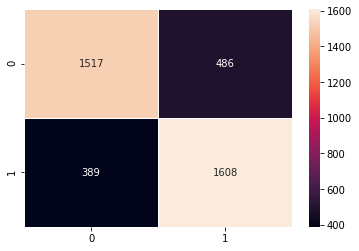

In [34]:
# visualize confusion matrix
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

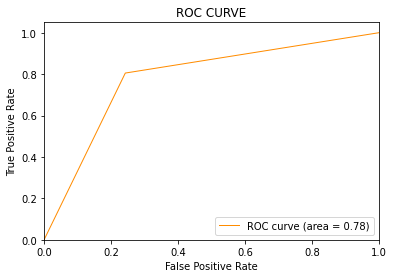

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

LogisticRegerssion with One vs Rest

https://medium.com/@agrawalsam1997/multiclass-classification-onevsrest-and-onevsone-classification-strategy-2c293a91571a

In [36]:
# LogisticRegression with One Vs Rest Mulit Class and High Regularization 
lr_ovr = LogisticRegression(C=0.01, multi_class='ovr')

# Fitting and Predicting
lr_ovr.fit(X_train, y_train)
y_pred = lr_ovr.predict(X_test)

print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Accuracy Score        :  0.73775
Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      2003
           1       0.74      0.73      0.73      1997

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



[[1502  501]
 [ 548 1449]]


<Axes: >

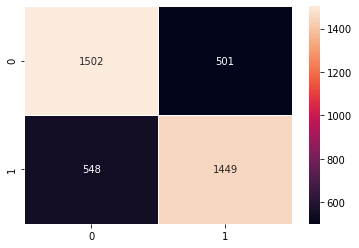

In [38]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

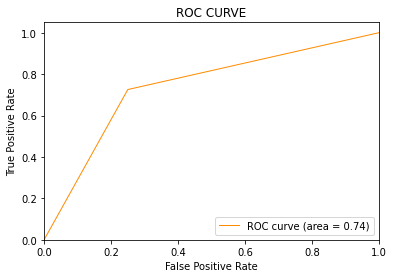

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()